In [2]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline


In [3]:
CONSUMER_KEY    = 'O1cU3FTzo7QcM0bwQzuM9MOZG'
CONSUMER_SECRET = 'lVrZEfNRSbkgIvGrXKccahIuKgkszdLebx21rJamw6ukb6Wt52'
ACCESS_TOKEN  = '941945158873915392-Gb0x45RTvnoTN5KIBfP0BP29ELAtUJc'
ACCESS_SECRET = 'EjuvEP0qCDwa6yKjB0aprGfdIzjxwOD615X04pCazVE3P'

In [4]:
def t_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    return tweepy.API(auth)

In [5]:
tweet_s=t_setup()
def get_tweets(username,count):
    tweets = tweet_s.user_timeline(screen_name=username, count=count)
    return tweets

In [6]:
print('Lets us see what US Prez tweeted recently\n')
tweets=get_tweets("realDonaldTrump",100)
print(tweets[0].text)
print('time of tweet\n')
print(tweets[0].created_at)

Lets us see what US Prez tweeted recently

States and Cities throughout our Country are being cheated and treated so badly by online retailers. Very unfair to… https://t.co/CSLMfhPLLq
time of tweet

2018-04-17 22:59:20


In [7]:
data=pd.DataFrame()
data['tweets']=[tweet.text for tweet in tweets]
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
#dataframe for further use
data.head(10)


,tweets,len,ID,Date,Source,Likes,RTs
0,States and Cities throughout our Country are b...,140,986378606606737408,2018-04-17 22:59:20,Twitter for iPhone,8515,2193
1,RT @IvankaTrump: Great to be with Secretary Mn...,144,986362521417371648,2018-04-17 21:55:25,Twitter for iPhone,0,1829
2,RT @FoxBusiness: WATCH LIVE: @IvankaTrump and ...,140,986362433479610370,2018-04-17 21:55:04,Twitter for iPhone,0,1479
3,....Congress – House and Senate must quickly p...,140,986357230219022342,2018-04-17 21:34:23,Twitter for iPhone,15038,3978
4,Today’s Court decision means that Congress mus...,140,986357228306354178,2018-04-17 21:34:23,Twitter for iPhone,17178,4866
5,Welcome Prime Minister Abe! https://t.co/538EY...,51,986344953134673922,2018-04-17 20:45:36,Twitter for iPhone,24831,6171
6,Rasmussen just came out at 51% Approval despit...,140,986303188587425794,2018-04-17 17:59:39,Twitter for iPhone,48105,12025
7,Getting ready to meet Prime Minister Abe of Ja...,74,986301228337508354,2018-04-17 17:51:52,Twitter for iPhone,44771,7329
8,RT @NFIB: Our Optimism Index reached its 16th ...,140,986294947841232896,2018-04-17 17:26:54,Twitter for iPhone,0,2933
9,"RT @VP: Thanks to the historic TRUMP TAX CUTS,...",144,986294728810487808,2018-04-17 17:26:02,Twitter for iPhone,0,6512


## Is Prez Trump a bit talkative ?


In [8]:
mean = np.mean(data['len'])
tweets_hillary=get_tweets('HillaryClinton',100)
len_tweets_hillary=np.array([len(tweet.text) for tweet in tweets_hillary])
mean_h=np.mean(len_tweets_hillary)
if(mean> mean_h):
    print('Nothing to be suprised !!!!\n')
    print('Average length of Trumps Tweet')
    print(mean)
else:
    print('OMG What!!!!')

Nothing to be suprised !!!!

Average length of Trumps Tweet
126.96


In [9]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])
fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

In [10]:
print('favourite_tweet by Prez Trump----->')
print(data['tweets'][fav])
print('\nMost retweeted_tweet of Prez Trump----->')
print(data['tweets'][rt])

favourite_tweet by Prez Trump----->
A perfectly executed strike last night. Thank you to France and the United Kingdom for their wisdom and the power o… https://t.co/oIPJVo3zQn

Most retweeted_tweet of Prez Trump----->
Russia vows to shoot down any and all missiles fired at Syria. Get ready Russia,  because they will be coming, nice… https://t.co/tFXJAYDnOh


In [11]:
tlen = pd.Series(data['len'].values, index=data['Date'])
tfav = pd.Series(data['Likes'].values, index=data['Date'])
tret = pd.Series(data['RTs'].values, index=data['Date'])
print(type(tlen))
print(type(tfav))
print(type(tret))
print(tlen[:4])


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Date
2018-04-17 22:59:20    140
2018-04-17 21:55:25    144
2018-04-17 21:55:04    140
2018-04-17 21:34:23    140
dtype: int64


## length of tweets vs time

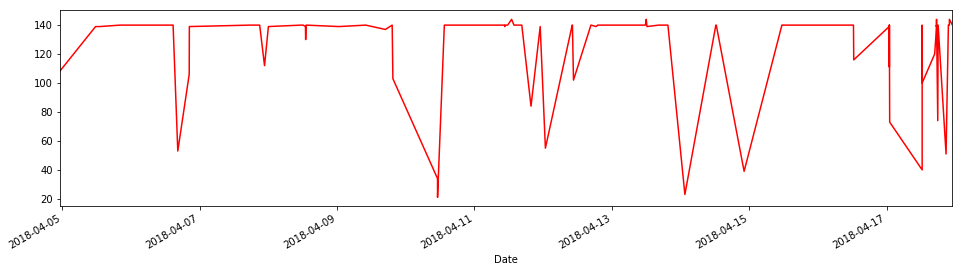

In [12]:
tlen.plot(figsize=(16,4), color='r')

## Likes over time

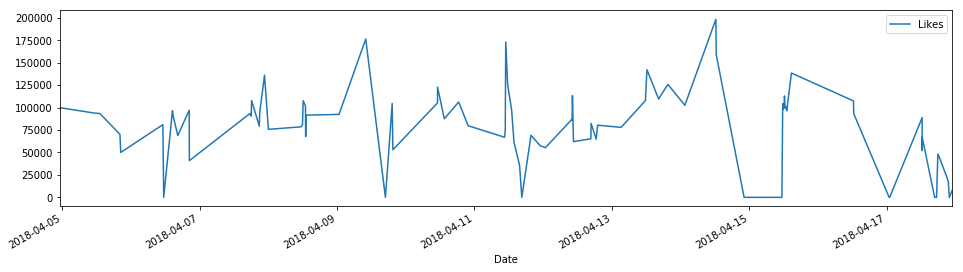

In [13]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)

## RETWEETS  OVER TIME

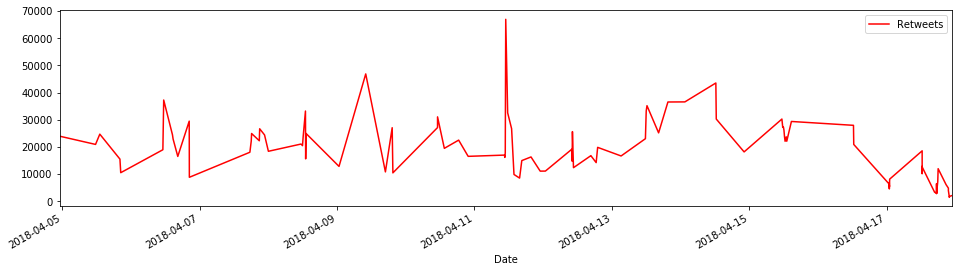

In [14]:
tret.plot(figsize=(16,4), label="Retweets", legend=True,color='r')

In [15]:
import textblob
import re

In [16]:
!python -m textblob.download_corpara

/home/aidris/anaconda3/bin/python: No module named textblob.download_corpara


In [17]:
from textblob import TextBlob

In [18]:
 def clean_tweet(tweet):
        '''
        clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 

In [19]:
 def get_tweet_sentiment(tweet):
        '''
        to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        analysis = TextBlob(clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [20]:
get_tweet_sentiment(data['tweets'][0])

'negative'

In [21]:
data['sentiment nature']=[get_tweet_sentiment(tweet) for tweet in data['tweets']]

In [22]:
data[:10]

,tweets,len,ID,Date,Source,Likes,RTs,sentiment nature
0,States and Cities throughout our Country are b...,140,986378606606737408,2018-04-17 22:59:20,Twitter for iPhone,8515,2193,negative
1,RT @IvankaTrump: Great to be with Secretary Mn...,144,986362521417371648,2018-04-17 21:55:25,Twitter for iPhone,0,1829,positive
2,RT @FoxBusiness: WATCH LIVE: @IvankaTrump and ...,140,986362433479610370,2018-04-17 21:55:04,Twitter for iPhone,0,1479,positive
3,....Congress – House and Senate must quickly p...,140,986357230219022342,2018-04-17 21:34:23,Twitter for iPhone,15038,3978,negative
4,Today’s Court decision means that Congress mus...,140,986357228306354178,2018-04-17 21:34:23,Twitter for iPhone,17178,4866,negative
5,Welcome Prime Minister Abe! https://t.co/538EY...,51,986344953134673922,2018-04-17 20:45:36,Twitter for iPhone,24831,6171,positive
6,Rasmussen just came out at 51% Approval despit...,140,986303188587425794,2018-04-17 17:59:39,Twitter for iPhone,48105,12025,positive
7,Getting ready to meet Prime Minister Abe of Ja...,74,986301228337508354,2018-04-17 17:51:52,Twitter for iPhone,44771,7329,positive
8,RT @NFIB: Our Optimism Index reached its 16th ...,140,986294947841232896,2018-04-17 17:26:54,Twitter for iPhone,0,2933,positive
9,"RT @VP: Thanks to the historic TRUMP TAX CUTS,...",144,986294728810487808,2018-04-17 17:26:02,Twitter for iPhone,0,6512,negative


In [23]:
positive_tweets=data['tweets'][data['sentiment nature']=='positive']
neutral_tweets=data['tweets'][data['sentiment nature']=='neutral']
negative_tweets=data['tweets'][data['sentiment nature']=='negative']
len_pos=len(positive_tweets)
len_neg=len(negative_tweets)
len_neu=len(neutral_tweets)
print(len_pos,len_neg,len_neu)


52 29 19


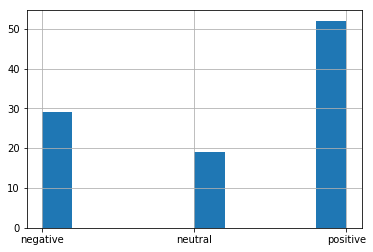

In [24]:
data['sentiment nature'].hist()


### using already processed tweets.txt

In [25]:
import sys
sys.path.append('/home/aidris/Pictures/twitterSNA')


In [26]:
tweets=pd.read_table('twitterSNA/tweets.txt')
print(len(tweets['tweets']))

3410


In [27]:
from preprocesstweet import clean

In [28]:
tweets['tweets']=tweets['tweets'].apply(clean)

In [29]:
tweets['tweets'].to_csv('./twitterSNA/cleanedtweets.csv')

In [30]:
"""
    Not used yet 
    to convert tweepy status object to string type
    """
def statustoSTR(tweet):
    
    import json
    return json.dumps(tweet._json)


In [31]:
"""
Not used yet
"""
word_counts={}
for tweet in tweets['tweets']:
    for word in tweet.split():
        if word not in word_counts:
            word_counts[word]=1
        else:
            word_counts[word]+=1
print("Size of vocabulary:{}".format(len(word_counts.items())))


Size of vocabulary:7595


In [32]:
"""
not used yet

embeddings_index={}
with open('twitterSNA/glove.twitter.27B/glove.twitter.27B.200d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split(' ')
        word=values[0]
        embedding=np.asarray(values[1:],dtype='float32')
        embeddings_index[word]=embedding
print('Word embeddings:',len(embeddings_index))
"""

"\nnot used yet\n\nembeddings_index={}\nwith open('twitterSNA/glove.twitter.27B/glove.twitter.27B.200d.txt',encoding='utf-8') as f:\n    for line in f:\n        values=line.split(' ')\n        word=values[0]\n        embedding=np.asarray(values[1:],dtype='float32')\n        embeddings_index[word]=embedding\nprint('Word embeddings:',len(embeddings_index))\n"

In [33]:
"""
not used yet

embedding_dim = 200 
clean_tweets=tweets['tweets']
embed_tweets = [] # Contains the 'average' embedding for each tweet
total_embeds = 0 
null_embeds = 0 

for tweet in clean_tweets:
    avg_embed = np.zeros(embedding_dim) 
    for word in tweet.split():
        total_embeds += 1
        embed = embeddings_index.get(word)
        if embed is not None:
            avg_embed += embed # Add embedding's values to vectors
        else:
            null_embeds += 1
    embed_tweets.append(avg_embed/len(tweet.split()))

print("Total Number of Embeddings:", total_embeds)
print("Number of Null Embeddings:", null_embeds)
print("% of Embeddings that are Null: {}%".format(round(null_embeds/total_embeds,4)*100))
"""

'\nnot used yet\n\nembedding_dim = 200 \nclean_tweets=tweets[\'tweets\']\nembed_tweets = [] # Contains the \'average\' embedding for each tweet\ntotal_embeds = 0 \nnull_embeds = 0 \n\nfor tweet in clean_tweets:\n    avg_embed = np.zeros(embedding_dim) \n    for word in tweet.split():\n        total_embeds += 1\n        embed = embeddings_index.get(word)\n        if embed is not None:\n            avg_embed += embed # Add embedding\'s values to vectors\n        else:\n            null_embeds += 1\n    embed_tweets.append(avg_embed/len(tweet.split()))\n\nprint("Total Number of Embeddings:", total_embeds)\nprint("Number of Null Embeddings:", null_embeds)\nprint("% of Embeddings that are Null: {}%".format(round(null_embeds/total_embeds,4)*100))\n'

## MARKOV CHAINS TWEET MODEL

In [42]:
from collections import defaultdict

def model(corpus):
    markov_dict = {'<start>':[]}
    starting_words = []
    for tweet in corpus.tweets:
        tok_tweet = tweet.split()
        word_count = len(tok_tweet)
        for index, word in enumerate(tok_tweet):
            if word not in markov_dict.keys():
                markov_dict[word] = []

            if index == word_count - 1:
                markov_dict[word].append("<end>")
                #couplet = (tok_tweet[index], "<EOT>")
            else:
                if index == 0:
                    starting_words.append(word)
                markov_dict[word].append(tok_tweet[index+1])
    return markov_dict, starting_words
markov_dict, starting_words = model(tweets)
print(list(markov_dict.items())[0:5])

[('<start>', []), ('rt', ['@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@',

In [49]:
def write_tweet(starting_word, chain):
    """
    for any passed starting word
    will choose next word from 
    markov_dict alias chain here
    """
    tweet = starting_word
    current_word = starting_word
    
    while len(tweet) <= 140:        
        next_word = np.random.choice(chain[current_word])
        if next_word == '<end>':
            return tweet
        
        new_tweet = tweet + ' ' + next_word
        if  len(new_tweet) > 140:
            return tweet
        else:
            tweet = new_tweet
            current_word = next_word
f=open('./twitterSNA/predicted_tweets','w')
for x in range(0,100):
    starting_word = np.random.choice(starting_words)
    t=write_tweet(starting_word, markov_dict)
    print(str(t)+"\n")
    f.write(t)
    f.write('\n')
    

# kateslaw and companies coming back to pursue peac…

sally yates under trump”

may be better ! things about russia voted 150 vote congrats ! if he totally vindicates “trump” to heed the people that was a true star for

rt @ nbc news maybe the american steel and record setting 4331 shooting of people get worse just a new york operation

the russiatrump collusion between trump/russia story is weak on @ jbanafw we are vital to welcome the same russian collusion when they hate

is still kneel !

just stated red line plant/plants in washington this the fake news bombshell : thanks to a very exciting two groups are in just said roy

heading back from xi jinping of pennsylvania tonight at the eu wants to be better highly respected again !

how a 16 year to do for what great !

great jobs numbers the fake news cnn made more impressed and be at 7 countries which is n…

thank you

republican last night in the border wall street is 50 days with you have governor for real scandal

since @ nycmayo

### FINALLY WORD CLOUD OF TWEETS COLLECTED

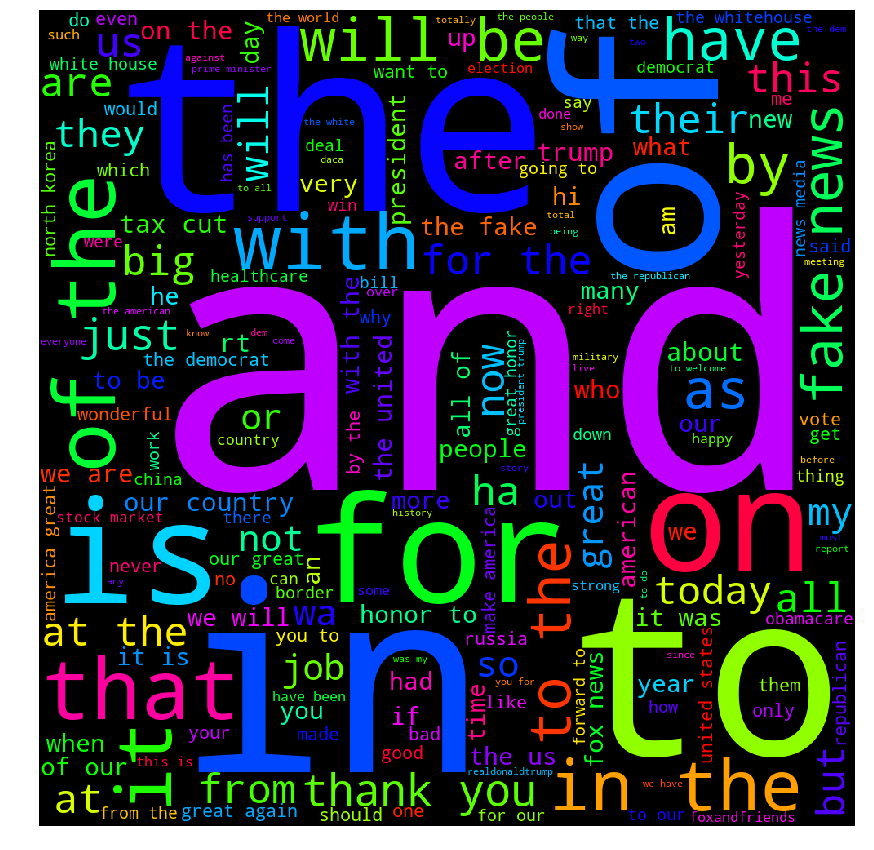

In [41]:
from wordcloud import WordCloud
wordcld = pd.Series(tweets['tweets'].tolist())
cloud = WordCloud(width=1000, height=1000,
                  stopwords=('https', 'http', 'com'), 
                  colormap='hsv').generate(''.join(wordcld.astype(str)))

plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [117]:
df=pd.read_table('./twitterSNA/newtweet.txt')
df2=pd.read_table('./twitterSNA/newtweetslabels.txt')

    

In [118]:
train_feature=df['tweets'][0:1100]
train_labels=df2['retweets'][0:1100]
test_feature=df['tweets'][1100:]
test_labels=df2['retweets'][1100:]
print(len)

In [119]:
vectorizer=CountVectorizer()
transformer=TfidfTransformer()
train_feature=vectorizer.fit_transform(feature_train)
test_feature=vectorizer.transform(feature_test)
train_feature=transformer.fit_transform(train_feature)
test_feature=transformer.transform(test_feature)

In [120]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

In [121]:
svd=TruncatedSVD(n_components=4,random_state=42)
train_feature=svd.fit_transform(train_feature)
test_feature=svd.transform(test_feature)




In [122]:
from sklearn.svm import SVR
clf=SVR()
clf.fit(train_feature,label_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [123]:
y_pred=clf.predict(test_feature)

In [128]:
df=pd.DataFrame()
df['predicted retweets']=y_pred
print(len(y_pred))
df['actual retweets']=test_labels
print(len(test_labels))

1375
496


In [125]:
df

,predicted retweets,actual retweets
0,2165.977681,NaN
1,2152.689739,NaN
2,2149.529441,NaN
3,2147.735540,NaN
4,2155.280926,NaN
5,2155.306809,NaN
6,2152.340449,NaN
7,2158.005505,NaN
8,2146.661729,NaN
9,2151.747301,NaN
